# it provides a comprehensive overview of the NVIDIA GPU devices installed in the system.

In [ ]:

!nvidia-smi


Sat Dec 16 19:31:48 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# assigns the current working directory to the variable 'HOME', and then prints its value.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)


/content


# installs the Ultralytics library version 8.0.20 via pip, clears the output display in IPython, then imports the Ultralytics package and performs checks to ensure it's properly installed and functioning.

In [ ]:

# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.2/78.2 GB disk)


# imports the YOLO class from the Ultralytics library, allowing to utilize YOLO object detection functionality. Additionally, it imports the display and Image modules from IPython, enabling the display of images within the IPython environment.

In [ ]:

from ultralytics import YOLO

from IPython.display import display, Image


%cd {HOME}: Changes the current directory to the location specified by the variable HOME, which typically represents the home directory or a specific path.



!yolo: This likely represents a command-line interface (CLI) command or script related to the YOLO (You Only Look Once) model.


task=detect: Specifies the task as detection, indicating that the model will detect objects.


mode=predict: Indicates the prediction mode, meaning the model will be used to make predictions on new data.


model=yolov8n.pt: Specifies the model to be used for prediction. Here, yolov8n.pt is the file containing the YOLOv8n model structure and weights.


conf=0.25: Sets a confidence threshold of 0.25, meaning the model will only display predictions where it's at least 25% confident about the detected objects.


source='https://media.roboflow.com/notebooks/examples/dog.jpeg': Specifies the source for prediction. In this case, it's an image of a dog accessible via the URL provided.

save=True: This indicate to save the output of the prediction.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True


/content
100% 6.23M/6.23M [00:00<00:00, 265MB/s]

2023-12-16 19:34:19.385353: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-16 19:34:19.385411: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-16 19:34:19.386782: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-16 19:34:20.449321: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<0

# uses the IPython Image module to display an image. It's pointing to an image file located at the path runs/detect/predict/dog.jpeg within the directory specified by the variable {HOME}. The height=600 parameter sets the displayed image's height to 600 pixels.

/content


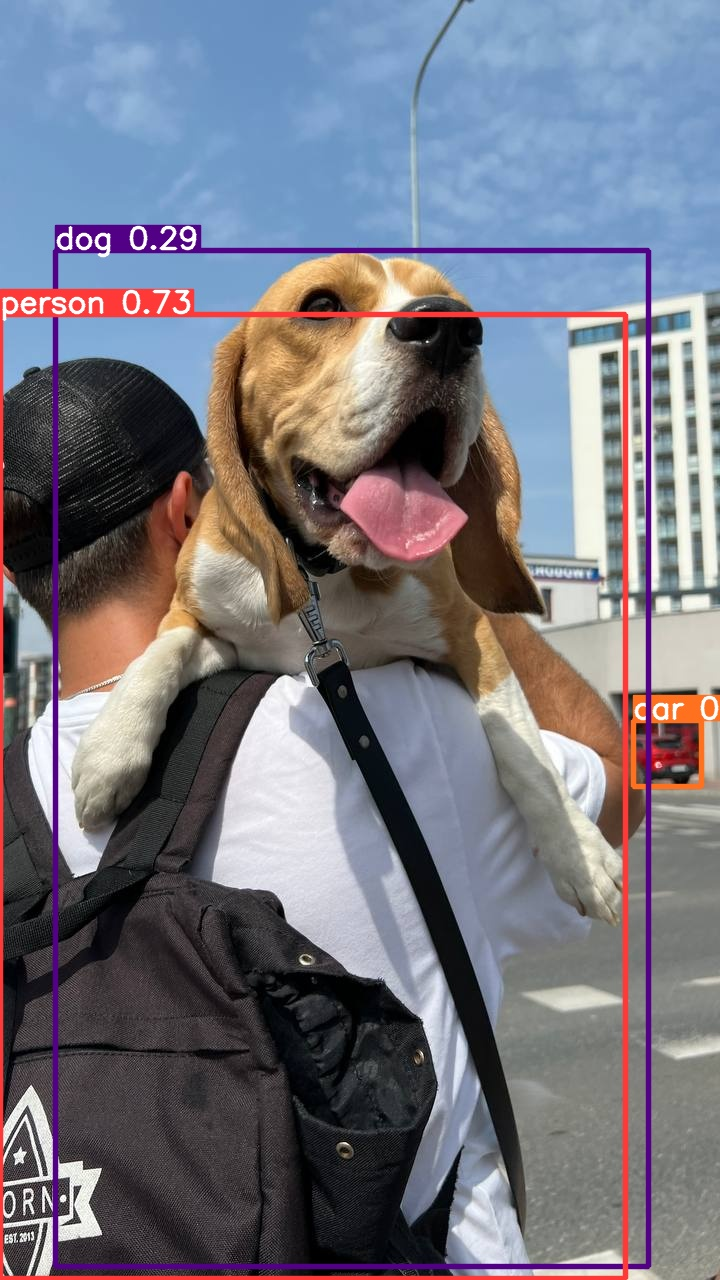

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)


# model = YOLO(f'{HOME}/yolov8n.pt'): This line initializes an instance of the YOLO model by loading the YOLOv8n model weights and architecture from the file located at the path specified by f'{HOME}/yolov8n.pt'.

#executes a prediction using the initialized YOLO model. It performs object detection on the image provided by the URL 'https://media.roboflow.com/notebooks/examples/dog.jpeg'. The conf=0.25 parameter sets the confidence threshold for displayed predictions to 0.25 (25% confidence). The results of this prediction are stored in the results variable.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


# results: This variable likely contains the output or results from the YOLO model's prediction on the image.

# [0]: Indicates that accessing the first element or the first set of predictions from the results.

# .boxes: Refers to the detected bounding boxes in the image. Bounding boxes are rectangles drawn around detected objects.

# .xyxy: This is a method or attribute that represent the coordinates of the bounding boxes. In YOLO, bounding boxes are often represented by their coordinates in the format (x_min, y_min, x_max, y_max), denoting the top-left and bottom-right corners of the box.

# So, results[0].boxes.xyxy likely accesses the coordinates (x, y) of the top-left and bottom-right corners of the bounding boxes around detected objects in the image after running the YOLO model's predictions.

In [ ]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

# The output provided appears to be a tensor containing sets of coordinates for bounding boxes in the YOLO model's predictions. Each row represents a different bounding box, and the four values in each row denote:

# The first value represents the predicted class or label (0.0 indicates the class ID or label).

# The next four values represent the coordinates of the bounding box in the format (x_min, y_min, x_max, y_max). These values denote the top-left (x_min, y_min) and bottom-right (x_max, y_max) corners of the bounding box.

# The device='cuda:0' part indicates that these calculations were performed on a CUDA-compatible GPU (likely NVIDIA GPU) indexed as device 0.


# Row 1: Predicted class 0.0, with coordinates (x_min=0, y_min=314, x_max=625, y_max=1278).

# Row 2: Predicted class 0.0, with coordinates (x_min=55, y_min=250, x_max=648, y_max=1266).

# Row 3: Predicted class 0.0, with coordinates (x_min=633, y_min=720, x_max=701, y_max=786).


# These coordinates indicate the bounding boxes' positions within the image. The (x_min, y_min) coordinates denote the top-left corner of the box, and (x_max, y_max) denote the bottom-right corner.

# [0]: Indicates that accessing the first element or the first set of predictions from the results.

# .boxes: Refers to the detected bounding boxes in the image.

# .conf: This is likely an attribute or method that provides the confidence scores associated with the predicted bounding boxes.

In [ ]:

results[0].boxes.conf


tensor([0.72713, 0.29066, 0.28455], device='cuda:0')

# The first bounding box has a confidence score of approximately 0.72713, indicating relatively high confidence.

# The second bounding box has a confidence score of approximately 0.29066, which might represent moderate confidence.

# The third bounding box has a confidence score of approximately 0.28455, which is also a moderate confidence score.

# results: This variable likely contains the output or results from the YOLO model's prediction on the image.


# [0]: Indicates that accessing the first element or the first set of predictions from the results.


# .boxes: Refers to the detected bounding boxes in the image.


# .cls: This is likely an attribute or method that provides the predicted classes associated with the bounding boxes.


# Therefore, results[0].boxes.cls should return the predicted classes for each of the detected bounding boxes. These classes indicate the category or label of the object that the model predicts to be present within each bounding box.

In [ ]:

results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

# The first bounding box is predicted to belong to class 0.
# The second bounding box is predicted to belong to class 16.
# The third bounding box is predicted to belong to class 2.


# Dataset Split

# TRAIN SET
# 86%
# 3424 Images
# VALID SET
# 9%
# 348 Images
# TEST SET
# 6%
# 227 Images

#Preprocessing
#Resize: Stretch to 640x640
#Augmentations
#Outputs per training example: 3
#Flip: Horizontal, Vertical
#90° Rotate: Clockwise, Counter-Clockwise
#Bounding Box: 90° Rotate: Clockwise, Counter-Clockwise

In [ ]:
!rmdir {HOME}/datasets
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="PuwNh67WvxBDmH7VOt04")
project = rf.workspace("garbage-detection-czeg5").project("garbage_detection-wvzwv")
dataset = project.version(16).download("yolov8")


rmdir: failed to remove '/content/datasets': No such file or directory
/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.4 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headle

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to garbage_detection-16 in yolov8:: 100%|██████████| 7080/7080 [00:02<00:00, 3411.37it/s]


%cd {HOME}: This is a command used in some programming environments, like Jupyter Notebook or IPython, to change the current directory to the location specified by {HOME}. {HOME} usually represents home directory or a specific path.


!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=800 plots=True:

This line is running a command-line interface (CLI) command prefixed with ! that appears to be using a tool or script named yolo. Here's a breakdown of the command:


yolo: the YOLO (You Only Look Once) model.


task=detect: Specifies that the task is detection, meaning it's trying to detect objects in images.


mode=train: Indicates that the model is in training mode, meaning it's learning patterns from the provided dataset.
model=yolov8s.pt: Specifies the model architecture or file name (yolov8s.pt) that the script will use for training. This file likely contains the pre-defined structure and weights for the YOLOv8s model.


data={dataset.location}/data.yaml: Points to the location of the dataset used for training. {dataset.location}/data.yaml is likely a YAML file that contains information about the dataset, such as the paths to images and annotations (bounding boxes around objects).


epochs=100: Specifies the number of training epochs, which represents how many times the entire dataset will be used to train the model.


imgsz=800: Sets the input image size to 800x800 pixels for training. This determines the resolution of the images that the model will process during training.


plots=True: This indicate whether to generate plots or visualizations during or after training, which can help analyze the training progress and results.



In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=800 plots=True


/content
100% 21.5M/21.5M [00:00<00:00, 290MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/garbage_detection-16/data.yaml, epochs=100, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, k

# Epoch Details:

# Epoch 100/100: The final epoch of training.

# GPU_mem 7.64G: GPU memory usage at the end of training.
# Losses:

# box_loss 0.3455: Loss associated with the predicted bounding box coordinates.
# cls_loss 0.2566: Loss related to class predictions.
# dfl_loss 1.093: Another loss metric used in the model.

# Instances and Size:

# Instances 4: The number of object instances detected in this epoch.

# Size 800: Image size used during training (800x800).
# Training Progress:

# 100% 190/190 [01:40<00:00, 1.89it/s]: Completion status for 190 batches processed in 1 minute 40 seconds at a rate of 1.89 iterations per second.
# Metrics:

# Class, Images, Instances, Box(Precision, Recall): Evaluation metrics on the validation set after the final epoch.
# Precision (P) 0.807: The model's precision in identifying objects.
# Recall (R) 0.746: The model's ability to detect all relevant objects.
# mAP (mean Average Precision):

# mAP50 0.779: The mean Average Precision at IoU of 0.5.
# mAP50-95 0.465: Mean Average Precision over the range of IoU thresholds from 0.5 to 0.95.
# In simple terms, after the 100th epoch:

# The model's losses are relatively low.
# It detected four instances within the images.
# It shows good precision and recall for detected objects.
# The mAP scores indicate strong performance in object detection, especially at lower IoU thresholds.
# This suggests that the model has been trained well, achieving good accuracy in detecting objects within images.








In [ ]:
!ls {HOME}/runs/detect/train/


args.yaml					    results.png		   val_batch0_pred.jpg
confusion_matrix.png				    train_batch0.jpg	   val_batch1_labels.jpg
events.out.tfevents.1702755511.21950ee27fde.2119.0  train_batch17100.jpg   val_batch1_pred.jpg
F1_curve.png					    train_batch17101.jpg   val_batch2_labels.jpg
P_curve.png					    train_batch17102.jpg   val_batch2_pred.jpg
PR_curve.png					    train_batch1.jpg	   weights
R_curve.png					    train_batch2.jpg
results.csv					    val_batch0_labels.jpg


/content


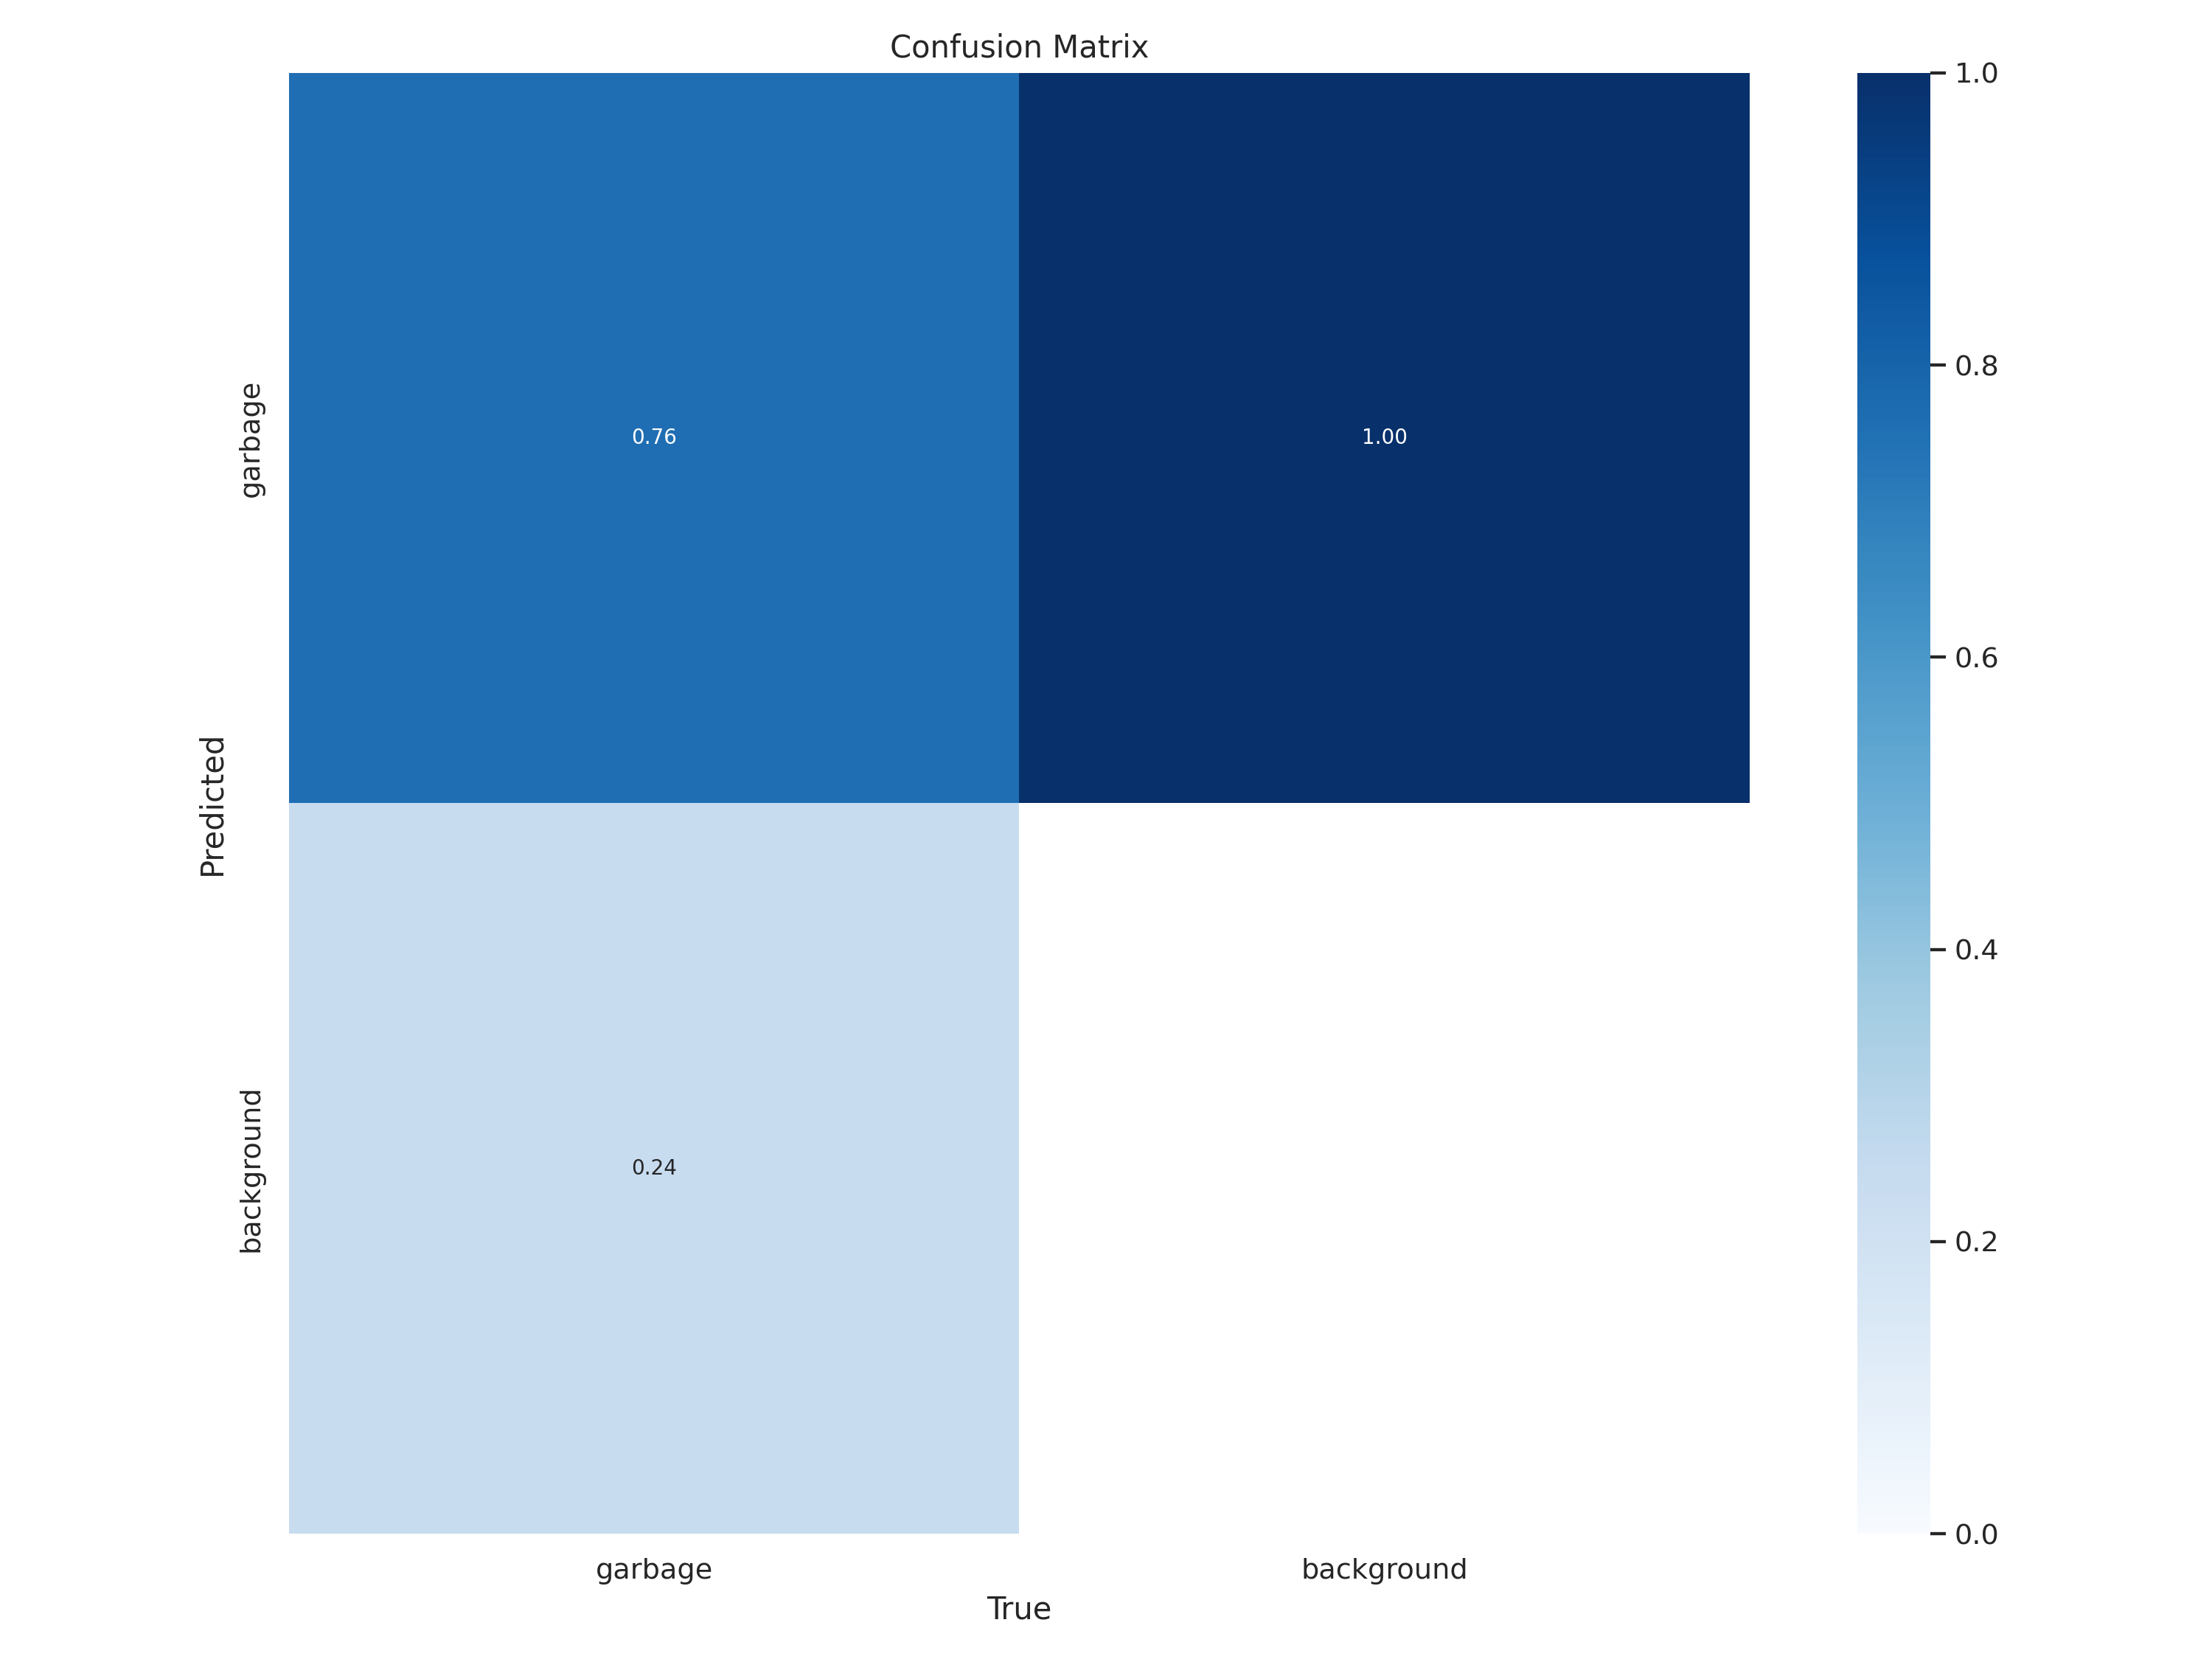

In [ ]:

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


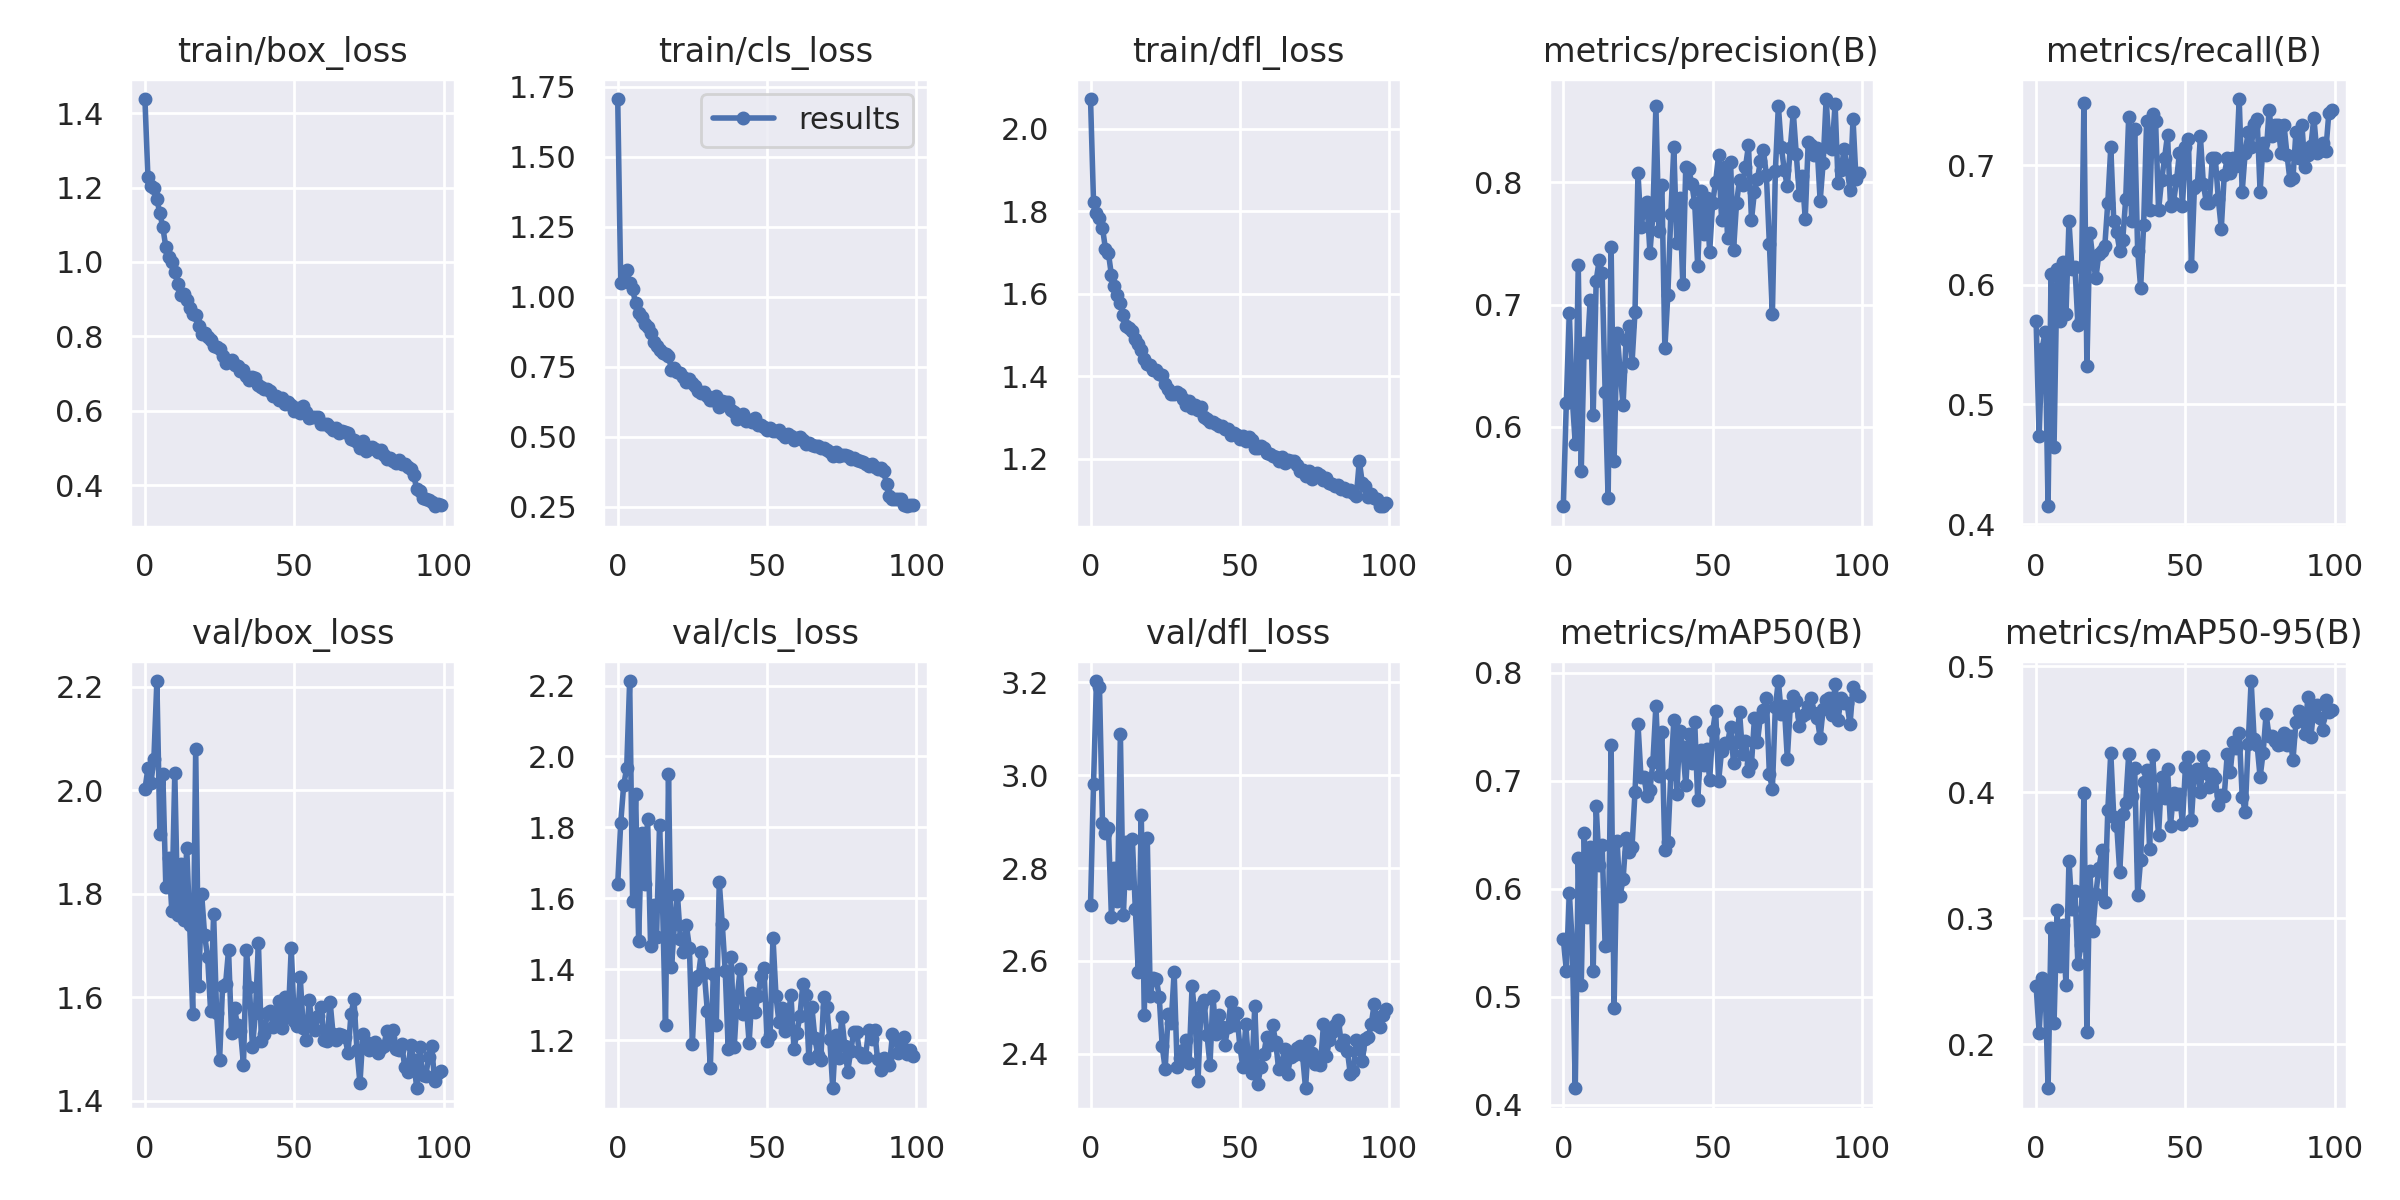

In [ ]:

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


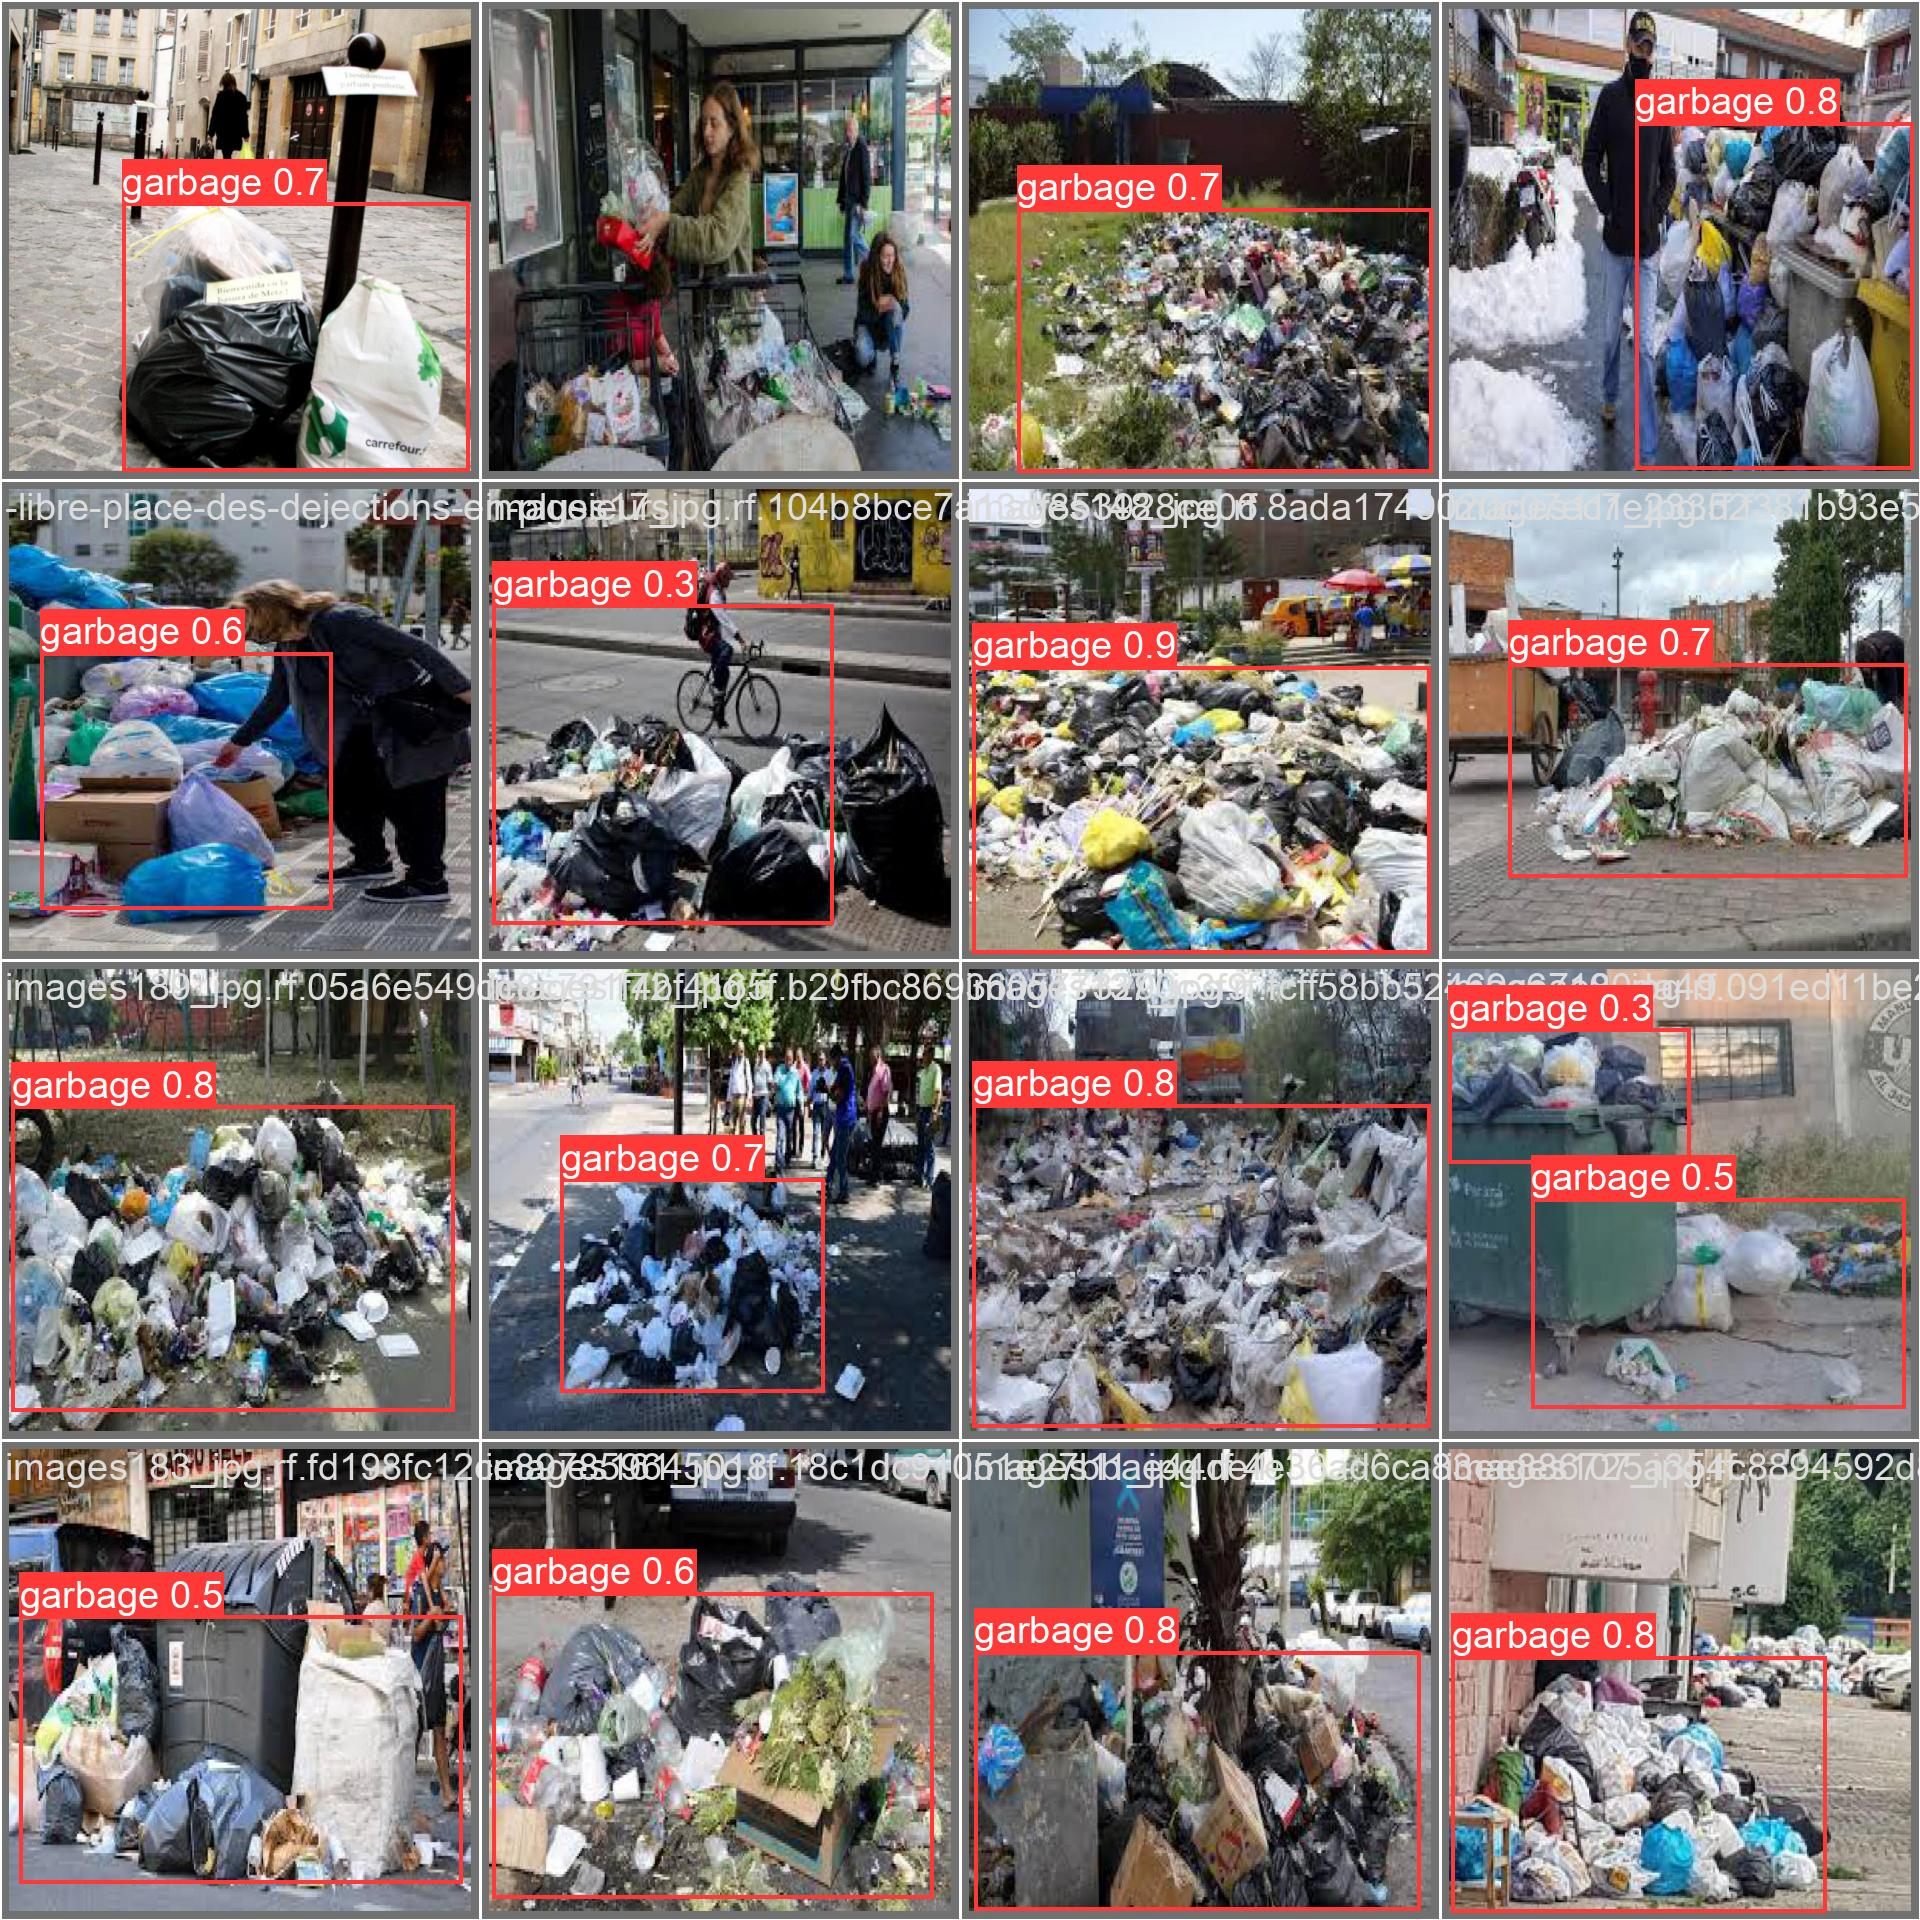

In [ ]:

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

# Validating a custom model is necessary to ensure it performs accurately and reliably on new, unseen data. This step helps confirm that the model generalizes well beyond the data it was trained on, ensuring it can effectively recognize patterns or objects it hasn't encountered before. Validation helps detect any potential issues, assesses its performance, and builds confidence in its ability to work correctly in real-world scenarios.

# %cd {HOME}: This command changes the current directory in the notebook to the location stored in the HOME variable.



# %cd {HOME} ensures that in the right directory (as set by HOME).
# !yolo indicates that running a command-line operation, likely leveraging a YOLO tool or script.
# task=detect specifies the task as detection (finding objects in an image).
# mode=val sets the mode to validation, meaning the model will evaluate its performance on a validation dataset.
# model={HOME}/runs/detect/train/weights/best.pt specifies the path to the trained model's weights to be used for validation.
# data={dataset.location}/data.yaml points to the configuration file (data.yaml) used for the detection task, likely containing information about classes, paths to data, etc.
# In simpler terms, this command runs the YOLO model evaluation on a validation dataset using the trained model (best.pt) located in a specific directory ({HOME}/runs/detect/train/weights/). The data.yaml file holds important configuration details for this evaluation, such as data paths and class information. This process assesses how well the model performs on unseen validation data after training.

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-12-17 00:21:13.515946: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-17 00:21:13.515992: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-17 00:21:13.517488: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-17 00:21:14.617203: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/garbage_detection-16/valid/label

# This information summarizes how accurately the model detects objects and how fast it processes each image. It's a snapshot of the model's performance in terms of accuracy and speed during the evaluation process.


# Inferencewith a custom model means using that model to make predictions or find patterns in new data. It's like asking the trained model to perform tasks it learned during training, such as recognizing objects in images or making predictions based on what it learned from the provided examples.

# It's essential because after training a model, we want to know how well it works with new, unseen data. Inference helps understand if the model can accurately perform the tasks it was trained for in real-world scenarios. It's like testing a student after teaching them—a way to confirm if they've learned and can apply what they've been taught. Inference ensures model is reliable and can provide useful insights when it encounters new information.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True


/content
2023-12-17 00:21:55.600810: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-17 00:21:55.600869: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-17 00:21:55.602115: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-17 00:21:56.695055: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/201 /content/datasets/garbage_detection-16/test/images/0


# This output provides timings for different stages of processing an image with a specific shape (1, 3, 800, 800) using a model:

# Pre-process (0.7ms): Time taken to prepare the image for the model. It involves tasks like resizing, normalization, or any transformations needed before feeding it into the model.

# Inference (14.2ms): Time taken by the model to analyze the image and make predictions. This includes running the image through the neural network and generating outputs.

# Post-process (4.3ms): Time taken to process the model's outputs after inference. This might involve tasks like filtering, refining, or interpreting the model's predictions.

# Overall, for each image of the specified shape, it takes approximately 0.7 milliseconds to prepare it for the model, 14.2 milliseconds for the model to make predictions, and 4.3 milliseconds to process the model's outputs after inference. These timings give an idea of how fast the model can analyze an image of this particular size and shape.

# displays the first three JPEG images in the specified directory, showcasing them within the Notebook, each with a width of 600 pixels.

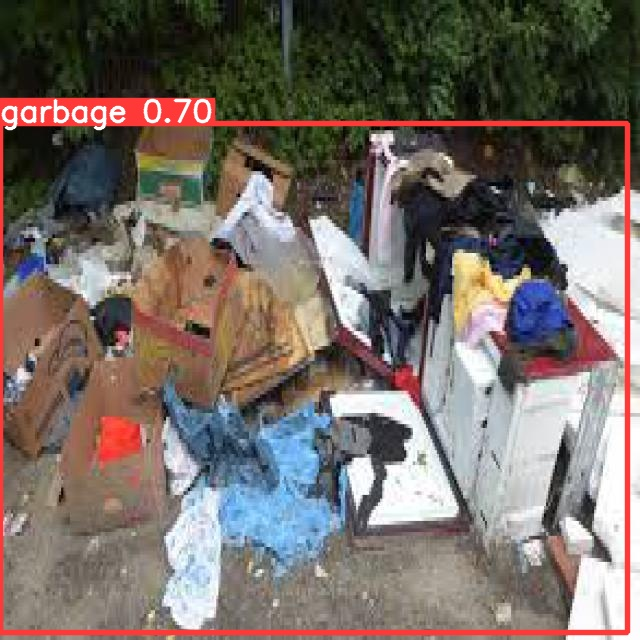

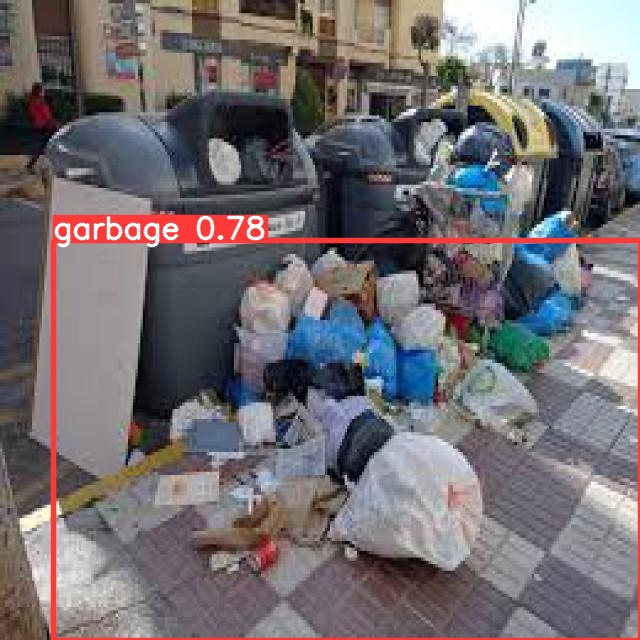

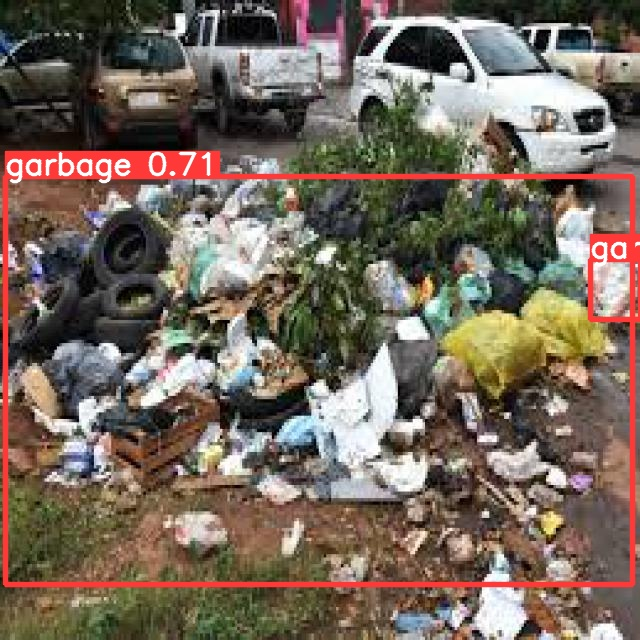

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")


In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
An error occured when getting the model upload URL: 404 Client Error: Not Found for url: https://api.roboflow.com/garbage-detection-czeg5/garbage_detection-wvzwv/16/uploadModel?api_key=PuwNh67WvxBDmH7VOt04&modelType=yolov8&nocache=true
